In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mandates

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import linear_model

from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential


In [2]:
#nflxdata = pd.read_csv("NFLX.csv", index_col = 'Date', parse_dates = True, infer_datetime_format = True)
nflxdata = pd.read_csv("NFLX.csv")
nflxdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
nflxdata.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [4]:
nflxdata.shape

(1009, 7)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


<AxesSubplot:>

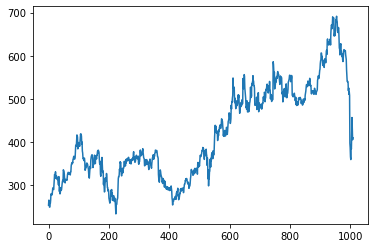

In [5]:
nflxdata['Adj Close'].plot()
# Plot the adj close 

In [6]:
output_var = pd.DataFrame(nflxdata['Adj Close']) 
# set target variable, which will be used as the value that will be predicted by the LSTM model, then outputted

In [7]:
features = ['Open', 'High', 'Low', 'Volume']
# independent variables to the target variable above

In [8]:
#Scaling the csv values down to cut down on memory consumption 
scaler = MinMaxScaler()
feature_tf = scaler.fit_transform(nflxdata[features])
feature_tf = pd.DataFrame(columns = features, data = feature_tf, index = nflxdata.index)
feature_tf.head()

,Open,High,Low,Volume
0,0.061253,0.038304,0.041331,0.186150
1,0.030059,0.035640,0.030273,0.198264
2,0.071243,0.048408,0.072770,0.135690
3,0.072334,0.037683,0.041265,0.141320
4,0.043474,0.011436,0.010729,0.272902


In [9]:
#Splits the csv data into sets for training the model (90% of the data) and testing the model (10% of the data)
timesplit = TimeSeriesSplit(n_splits=10) 
for train_index, test_index in timesplit.split(feature_tf):
        X_train, X_test = feature_tf[:len(train_index)], feature_tf[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [10]:
# processing the data for the LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [11]:
X_train.shape

(918, 1, 4)

In [12]:
X_test.shape # displays the shape of X_train and X_test

(91, 1, 4)

In [13]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1)) 
lstm.compile(loss='mean_absolute_error', optimizer='adam')


In [14]:
model = lstm.fit(X_train, y_train, epochs = 150, batch_size = 8, verbose = 1)
# training the model on 150 epochs

Epoch 1/150
115/115 [==============================] - 2s 2ms/step - loss: 401.3333
Epoch 2/150
115/115 [==============================] - 0s 2ms/step - loss: 400.0770
Epoch 3/150
115/115 [==============================] - 0s 2ms/step - loss: 396.5018
Epoch 4/150
115/115 [==============================] - 0s 1ms/step - loss: 389.7489
Epoch 5/150
115/115 [==============================] - 0s 2ms/step - loss: 379.8264
Epoch 6/150
115/115 [==============================] - 0s 2ms/step - loss: 367.1561
Epoch 7/150
115/115 [==============================] - 0s 2ms/step - loss: 352.1375
Epoch 8/150
115/115 [==============================] - 0s 2ms/step - loss: 335.0905
Epoch 9/150
115/115 [==============================] - 0s 2ms/step - loss: 316.2361
Epoch 10/150
115/115 [==============================] - 0s 2ms/step - loss: 295.7439
Epoch 11/150
115/115 [==============================] - 0s 2ms/step - loss: 273.7007
Epoch 12/150
115/115 [==============================] - 0s 2ms/step - loss

In [15]:
#LSTM Prediction
y_pred = lstm.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [16]:

MAE = metrics.mean_absolute_error(y_test, y_pred) # put the MAE of the model's product into the eponymous variable

In [17]:
MAE #display the MAE

6.265257071128092

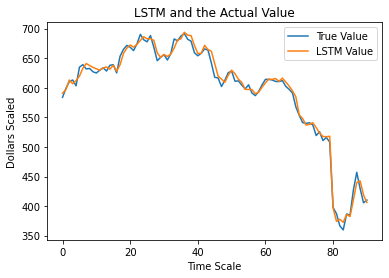

In [18]:
# Comparing the LSTM prediction and the actual value of the Adjusted for Close price via plot
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("LSTM and the Actual Value")
plt.xlabel('Time Scale')
plt.ylabel('Dollars Scaled')
plt.legend()
plt.show()

In [ ]:
# the basic LSTM model is not accurate (but very close) as to the predicting the hard values of stock prices most of the time
# but is able to follow downwards and upwards trends